In [1]:
# pip install protobuf==3.20.x

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import plotly.express as px
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras import layers, models
from tensorflow.keras import layers, models, regularizers, callbacks
from tensorflow.keras import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/donnees_meteo_avec_stations_et_altitudes_selection.csv')
df.shape

<ipython-input-3-7401f546e26d>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/donnees_meteo_avec_stations_et_altitudes_selection.csv')


(624619, 18)

In [4]:
#selectionner les dates > 1990
df = df[df["date"] > "1990-01-01 00:00:00+00:00"]

In [5]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d %H:%M:%S%z')
df['date'] = df['date'].dt.strftime('%d/%m/%Y')

In [6]:
df['date'] = pd.to_datetime(df['date'],format="%d/%m/%Y")

In [7]:
df = df.drop('Unnamed: 0',axis=1)
df = df.set_index('date')
df = df.sort_values(by='date')

In [8]:
df["altitude"] = df["altitude"].astype(str)
df["altitude"] = df["altitude"].str.replace(" ", "").str.replace(",", ".")
df["altitude"] = df["altitude"].astype(float)

In [9]:
# parameters = ["temperature_2m_mean","snowfall_sum","rain_sum","cloud_cover_mean","temperature_2m_max","temperature_2m_min","sunshine_duration","snowfall_water_equivalent_sum","wind_speed_10m_mean","soil_temperature_0_to_100cm_mean"]

# for parameter in parameters:
#     fig = px.line(df[parameter],width=1000,height=600)
#     fig.show()

# Preprocessing pour DeepL

#DF ouvertes

In [10]:
df= df.reset_index()

In [11]:
mask = df['state'] == 'open'
df_ouverte = df[mask]
df_ouverte

,date,latitude,longitude,temperature_2m_mean,snowfall_sum,rain_sum,cloud_cover_mean,temperature_2m_max,temperature_2m_min,sunshine_duration,snowfall_water_equivalent_sum,wind_speed_10m_mean,soil_temperature_0_to_100cm_mean,station,state,closed_year,altitude
0,1990-01-02,45.757330,6.539447,-12.501083,0.00,0.0,10.000000,-4.7365,-15.836500,27078.059,0.0,4.579532,-0.017729,Les Saisies,open,NaN,1650.0
1,1990-01-02,45.562302,6.838686,-13.582752,0.00,0.0,7.500000,-10.9515,-14.701500,27215.164,0.0,1.701560,-0.367396,Les Arcs,open,NaN,1200.0
2,1990-01-02,45.228571,6.406465,-9.382083,0.00,0.0,10.000000,-2.8175,-14.317500,27300.889,0.0,4.579532,0.927521,Les Karellis,open,NaN,1600.0
5,1990-01-02,45.860962,6.369704,-5.406834,0.00,0.0,22.625000,2.8640,-10.535999,26956.342,0.0,3.671933,0.623812,Manigod,open,NaN,1500.0
6,1990-01-02,45.091497,6.031317,-6.477833,0.00,0.0,8.125000,0.4180,-11.681999,27458.986,0.0,6.792732,0.371229,Villard Reculas,open,NaN,1480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398125,2025-03-01,45.617900,6.079700,1.148583,0.00,0.0,13.916667,7.5715,-3.778500,36113.230,0.0,2.741711,3.803583,Aillons Margeriaz,open,NaN,904.0
398127,2025-03-01,45.808300,6.244700,-2.357166,0.00,0.0,8.291667,3.6845,-6.815500,35787.410,0.0,2.841548,0.725958,Montmin - Col de la Forclaz,open,NaN,1157.0
398128,2025-03-01,45.562302,6.838686,-10.197667,0.00,0.0,63.541668,-4.4310,-18.831000,35882.110,0.0,5.459705,0.632500,Les Arcs,open,NaN,1200.0
398130,2025-03-01,45.228571,6.406465,-5.180585,0.63,0.0,63.500000,2.9715,-14.578500,35242.300,0.9,4.774879,2.029000,Les Karellis,open,NaN,1600.0


In [12]:
df_ouverte['date'] = pd.to_datetime(df_ouverte['date'],format='%d/%m/%Y')
df_ouverte = df_ouverte.set_index('date')

<ipython-input-12-38d189fe0ba3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ouverte['date'] = pd.to_datetime(df_ouverte['date'],format='%d/%m/%Y')


In [13]:
df_ouverte["altitude"] = df_ouverte["altitude"].astype(str)
df_ouverte["altitude"] = df_ouverte["altitude"].str.replace(" ", "").str.replace(",", ".")
df_ouverte["altitude"] = df_ouverte["altitude"].astype(float)

In [14]:
df_ouverte['closed_year'] = df_ouverte['closed_year'].apply(lambda x: 2125)

# DF fermées

In [15]:
dates_fermeture = {
    'Brison': pd.Timestamp('2008'),
    'Burzier': pd.Timestamp('1999'),
    'Col du Plainpalais' : pd.Timestamp('2019'),
    "Crey Rond" : pd.Timestamp('2000'),
    "Drouzin-Le-Mont" : pd.Timestamp('2012'),
    "Granier sur Aime" :pd.Timestamp('2017'),
    "La Sambuy" : pd.Timestamp('2023'),
    "Les Bossons - Chamonix" :pd.Timestamp('2023'),
    "Notre Dame du pré" : pd.Timestamp('2024'),
    "Saint-Jean de Sixt" : pd.Timestamp('2023'),
    "Saxel" : pd.Timestamp('2000'),
    "Sixt Fer à Cheval" : pd.Timestamp('2017'),
    "Verthemex - Mont du Chat" : pd.Timestamp('2000')
}

df['date_limite'] = df['station'].map(dates_fermeture)
mask = df['date'] <= df['date_limite']
df_filtre = df[mask].drop(columns=['date_limite','latitude','longitude'])
df_filtre

,date,temperature_2m_mean,snowfall_sum,rain_sum,cloud_cover_mean,temperature_2m_max,temperature_2m_min,sunshine_duration,snowfall_water_equivalent_sum,wind_speed_10m_mean,soil_temperature_0_to_100cm_mean,station,state,closed_year,altitude
3,1990-01-02,-6.517917,0.00,0.0,16.750000,2.3050,-11.095000,26588.805,0.000000,4.334946,1.175104,Burzier,closed,1999.0,920.0
4,1990-01-02,-7.155584,0.00,0.0,23.000000,1.5715,-12.128500,27083.596,0.000000,3.566964,0.166604,La Sambuy,closed,2023.0,1150.0
7,1990-01-02,-5.562832,0.00,0.0,16.750000,2.7080,-10.691999,26621.547,0.000000,4.334946,0.467813,Saint-Jean de Sixt,closed,2023.0,1000.0
8,1990-01-02,-9.096083,0.00,0.0,10.000000,-2.5315,-14.031500,27329.110,0.000000,4.579532,1.213521,Crey Rond,closed,2000.0,1430.0
10,1990-01-02,-7.115917,0.00,0.0,22.625000,1.7070,-11.693000,26849.125,0.000000,3.671933,0.577104,Brison,closed,2008.0,1003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384806,2023-12-28,-0.376583,0.00,0.0,74.000000,7.5630,-7.086999,19885.545,0.000000,4.322511,2.660583,Notre Dame du pré,closed,2024.0,1275.0
384858,2023-12-29,2.352583,0.00,0.3,90.416664,6.7630,-2.837000,26283.598,0.000000,3.240827,2.635230,Notre Dame du pré,closed,2024.0,1275.0
384882,2023-12-30,-0.745333,0.00,0.0,44.166668,6.9630,-7.836999,26662.354,0.000000,3.715851,2.603542,Notre Dame du pré,closed,2024.0,1275.0
384903,2023-12-31,-1.822416,9.80,0.2,95.083336,3.6130,-8.187000,0.000,14.000001,5.062634,2.524271,Notre Dame du pré,closed,2024.0,1275.0


In [16]:
df_filtre['date'] = pd.to_datetime(df_filtre['date'],format='%d/%M/%Y')
df_filtre = df_filtre.set_index('date')

In [17]:
df_filtre.index = pd.to_datetime(df_filtre.index)

# Fonction pour DF FINAL

In [18]:
df_final = pd.concat([df_ouverte,df_filtre])
# df_final = df_final.drop(['latitude','longitude'],axis=1)

In [19]:
df_final = df_final.sort_index().copy()
df_final.index = pd.to_datetime(df_final.index)

In [20]:
# Definition de la fonction qui crée des windows
def window_data(df, closing_years, window_size, step_size):

   X, y = [], []

   for i in range(0, len(df) - window_size + 1, step_size):
    window = df.iloc[i:i + window_size].values
    current_year = df.index[i + window_size - 1].year
    years_left = closing_years - current_year

    X.append(window)
    y.append(years_left)

   return X, y

In [43]:
# X, y = [], []

# for station in df_final['station'].unique().tolist():
#   df_station = df_final[df_final['station'] == station].sort_index()
#   station_closing_year = df_station['closed_year'].iloc[0]
#   df_station = df_station.drop('closed_year',axis=1)

#   station_windows, station_labels = window_data(df_station, station_closing_year, 1095, 365)

#   X.extend(station_windows)
#   y.extend(station_labels)

# X = np.array(X, dtype=np.float32)
# y = np.array(y, dtype=np.float32)

# print(f"X shape: {X.shape}")
# print(f"y shape: {y.shape}")

In [22]:
# print(len(X))
# print(len(y))
# print(y)

In [ ]:
# for X,y in zip(X,y):
#   print(X.shape,y)

# Deep Learning

In [ ]:
# # Train/Val split
# train_size = int(len(X) * 0.8)  # 80% pour l'entraînement
# val_size = len(X) - train_size  # 20% pour la validation

# # Séparation en train et validation
# X_train, y_train = X[:train_size], y[:train_size]  # Train
# X_val, y_val = X[train_size:], y[train_size:]  # Validation

# # Affichage des formes
# print(f"Train: X={X_train.shape}, y={y_train.shape}")
# print(f"Validation: X={X_val.shape}, y={y_val.shape}")

# scalers = []
# X_train_std = np.zeros_like(X_train)
# X_val_std = np.zeros_like(X_val)

# # Standardisation de chaque feature
# for feature in range(X_train.shape[2]):
#     scaler = StandardScaler()
#     X_train_std[:, :, feature] = scaler.fit_transform(X_train[:, :, feature])
#     X_val_std[:, :, feature] = scaler.transform(X_val[:, :, feature])
#     scalers.append(scaler)

In [ ]:
# Convertir les données en tensors
# X_train_tensor = tf.convert_to_tensor(X_train_std, dtype=tf.float32)
# y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)

# X_val_tensor = tf.convert_to_tensor(X_val_std, dtype=tf.float32)
# y_val_tensor = tf.convert_to_tensor(y_val, dtype=tf.float32)

# # Créer le dataset TensorFlow
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
# val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tensor, y_val_tensor))

# train_dataset = train_dataset.shuffle(buffer_size=100).batch(32)
# val_dataset = val_dataset.batch(32)

# print(f"Train dataset size: {len(X_train)}")
# print(f"Validation dataset size: {len(X_val)}")

# # Exemple
# for X_batch, y_batch in train_dataset.take(1):
#     print(X_batch.shape, y_batch.shape)

CNN

In [ ]:
# # CNN
# model = models.Sequential([
#     layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1],X.shape[2])),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
#     layers.GlobalAveragePooling1D(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1, activation='linear')
# ])

# model.summary()

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#               loss='mse',
#               metrics=['mae'])

In [ ]:
# # LSTM
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.models import Sequential

# model = Sequential()
# model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], X.shape[2])))
# model.add(Dense(units=1))

# model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# history = model.fit(train_dataset,epochs=300,validation_data=val_dataset,verbose=1)

In [ ]:
# # Afficher l'évolution de la loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Courbe d\'apprentissage')
# plt.show()

# plt.plot(history.history['mae'], label='Training MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')
# plt.xlabel('Epochs')
# plt.ylabel('MAE')
# plt.legend()
# plt.title('Erreur Absolue Moyenne')
# plt.show()

In [ ]:
# # Sauvegarder le modèle
# load_model('station_model_cnn_v2.h5',)

In [ ]:
# # Prédictions sur un batch de validation
# y_pred = model.predict(val_dataset)
# for i in range(5):
#     print(f"Prédit = {y_pred[i][0]:.2f} ans, Réel = {y_val[i]:.2f} ans")

# Entrainement sur stations fermées only

In [ ]:
# df_station_fermee = df_filtre.copy()
# df_station_fermee.index = pd.to_datetime(df_station_fermee.index)

In [ ]:
# for col in ['station']:
#     df_station_fermee[col] = LabelEncoder().fit_transform(df_station_fermee[col])

In [ ]:
# # Definition de la fonction qui crée des windows
# def window_data(df, closing_years, window_size, step_size):

#    X, y = [], []

#    for i in range(0, len(df) - window_size + 1, step_size):
#     window = df.iloc[i:i + window_size].values
#     current_year = df.index[i + window_size - 1].year
#     years_left = closing_years - current_year

#     X.append(window)
#     y.append(years_left)

#    return X, y

In [ ]:
# X, y = [], []

# for station in df_station_fermee['station'].unique().tolist():
#   df_station = df_station_fermee[df_station_fermee['station'] == station].sort_index()
#   station_closing_year = df_station['closed_year'].iloc[0]
#   df_station = df_station.drop('closed_year',axis=1)

#   station_windows, station_labels = window_data(df_station, station_closing_year, 1095, 365)

#   X.extend(station_windows)
#   y.extend(station_labels)

# X = np.array(X, dtype=np.float32)
# y = np.array(y, dtype=np.float32)

# print(f"X shape: {X.shape}")
# print(f"y shape: {y.shape}")

In [ ]:
# # Train/Val split
# train_size = int(len(X) * 0.8)
# val_size = len(X) - train_size

# X_train, y_train = X[:train_size], y[:train_size]
# X_val, y_val = X[train_size:], y[train_size:]

# print(f"Train: X={X_train.shape}, y={y_train.shape}")
# print(f"Validation: X={X_val.shape}, y={y_val.shape}")

# scalers = []
# X_train_std = np.zeros_like(X_train)
# X_val_std = np.zeros_like(X_val)

# # Standardisation
# for feature in range(X_train.shape[2]):
#     scaler = StandardScaler()
#     X_train_std[:, :, feature] = scaler.fit_transform(X_train[:, :, feature])
#     X_val_std[:, :, feature] = scaler.transform(X_val[:, :, feature])
#     scalers.append(scaler)

In [ ]:
# # Tensor
# X_train_tensor = tf.convert_to_tensor(X_train_std, dtype=tf.float32)
# y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)

# X_val_tensor = tf.convert_to_tensor(X_val_std, dtype=tf.float32)
# y_val_tensor = tf.convert_to_tensor(y_val, dtype=tf.float32)

# # Dataset
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
# val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tensor, y_val_tensor))

# train_dataset = train_dataset.shuffle(buffer_size=100).batch(32)
# val_dataset = val_dataset.batch(32)

# print(f"Train dataset size: {len(X_train)}")
# print(f"Validation dataset size: {len(X_val)}")

# # Exemple
# for X_batch, y_batch in train_dataset.take(1):
#     print(X_batch.shape, y_batch.shape)

In [ ]:
# # CNN

# early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# model = models.Sequential([
#     layers.Conv1D(filters=64, kernel_size=3, padding='same',
#                   kernel_regularizer=regularizers.l2(0.002), input_shape=(X.shape[1], X.shape[2])),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Dropout(0.4),

#     layers.Conv1D(filters=128, kernel_size=3, padding='same',
#                   kernel_regularizer=regularizers.l2(0.002)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Dropout(0.4),

#     layers.Conv1D(filters=128, kernel_size=3, padding='same',
#                   kernel_regularizer=regularizers.l2(0.002)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.GlobalAveragePooling1D(),
#     layers.Dropout(0.4),

#     layers.Dense(64, kernel_regularizer=regularizers.l2(0.002)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dropout(0.4),

#     layers.Dense(1, activation='linear')
# ])

# # Changer le learning rate
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# model.compile(optimizer=optimizer,
#               loss='mse',
#               metrics=[metrics.MeanAbsoluteError()])

In [ ]:
# history = model.fit(train_dataset,epochs=500,validation_data=val_dataset,verbose=1)

In [ ]:
# # Afficher l'évolution de la loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.title('Courbe d\'apprentissage')
# plt.show()

# plt.plot(history.history['mean_absolute_error'], label='Training MAE')
# plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
# plt.xlabel('Epochs')
# plt.ylabel('MAE')
# plt.legend()
# plt.title('Erreur Absolue Moyenne')
# plt.show()

In [ ]:
# # Sauvegarder le modèle
# from tensorflow.keras.models import load_model
# from tensorflow.keras import metrics
# model.save('station_fermee_model_cnn.h5')

In [ ]:
# y_val_pred = model.predict(X_val_tensor)

# # Calcul de l'erreur absolue moyenne en pourcentage (MAPE)
# mape = mean_absolute_percentage_error(y_val, y_val_pred) * 100
# print(f"MAPE : {mape:.2f}%")

Le modèle a été entraîné sur des stations fermées. Il pourrait être biaisé vers la fermeture et avoir du mal à prédire pour des stations encore viables.

# Classification

In [ ]:
df_classif = df_final.copy()

stations_ouvertes = df_classif.loc[df_classif["state"] == 'open']
stations_fermees = df_classif.loc[df_classif["state"] == 'closed']

df_classif = df_classif.drop(['state','snowfall_water_equivalent_sum','temperature_2m_mean'],axis=1)

stations_ouvertes = stations_ouvertes['station'].unique()
stations_fermees = stations_fermees['station'].unique()

# 80%
stations_ouvertes_sample = pd.Series(stations_ouvertes).sample(frac=0.8, random_state=1,replace = False)
stations_fermees_sample = pd.Series(stations_fermees).sample(frac=0.8, random_state=1,replace = False)

# 20%
stations_ouvertes_val = pd.Series(list(set(stations_ouvertes) - set(stations_ouvertes_sample)))
stations_fermees_val = pd.Series(list(set(stations_fermees) - set(stations_fermees_sample)))

train_df = df_classif[df_classif['station'].isin(list(stations_ouvertes_sample) + list(stations_fermees_sample))]
val_df = df_classif[df_classif['station'].isin(list(stations_ouvertes_val) + list(stations_fermees_val))]

print(f"Train set : {train_df.shape}")
print(f"Validation set : {val_df.shape}")

Train set : (261980, 11)
Validation set : (76939, 11)


In [ ]:
train_df['station'] = LabelEncoder().fit_transform(train_df['station'])
val_df['station'] = LabelEncoder().fit_transform(val_df['station'])

<ipython-input-44-c251936027e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['station'] = LabelEncoder().fit_transform(train_df['station'])
<ipython-input-44-c251936027e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['station'] = LabelEncoder().fit_transform(val_df['station'])


In [ ]:
# Definition de la fonction qui crée des windows
def window_data(df, closing_years, window_size, step_size):

    X, y = [], []

    for i in range(0, len(df) - window_size + 1, step_size):
        window = df.iloc[i:i + window_size].values
        current_year = df.index[i + window_size - 1].year
        years_left = closing_years - current_year

        X.append(window)

        if closing_years == 2125:
            y.append("still open")
        elif years_left < 4:
            y.append("short term")
        elif 4 <= years_left < 10:
            y.append("mid term")
        else:
            y.append("long term")


    print(f"window_data return: X={len(X)}, y={len(y)}")
    return X, y

In [ ]:
#Application de la fonction sur train_df et val_df
X_train, y_train = [], []

for station in train_df['station'].unique().tolist():
  df_station = train_df[train_df['station'] == station].sort_index()
  station_closing_year = df_station['closed_year'].iloc[0]
  df_station = df_station.drop(['closed_year','station'],axis=1)

  station_windows, station_labels = window_data(df_station, station_closing_year, 1865, 365)

  X_train.extend(station_windows)
  y_train.extend(station_labels)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)

print(f"X shape: {X_train.shape}")
print(f"y_encoded shape: {y_train.shape}")
print(f"Classes: {label_encoder.classes_}")

window_data return: X=31, y=31
window_data return: X=13, y=13
window_data return: X=17, y=17
window_data return: X=5, y=5
window_data return: X=24, y=24
window_data return: X=29, y=29
window_data return: X=28, y=28
window_data return: X=4, y=4
window_data return: X=28, y=28
window_data return: X=22, y=22
window_data return: X=31, y=31
window_data return: X=31, y=31
window_data return: X=5, y=5
window_data return: X=31, y=31
window_data return: X=31, y=31
window_data return: X=31, y=31
window_data return: X=31, y=31
window_data return: X=31, y=31
window_data return: X=31, y=31
window_data return: X=31, y=31
window_data return: X=31, y=31
window_data return: X=31, y=31
window_data return: X=31, y=31
window_data return: X=31, y=31
X shape: (609, 1865, 9)
y_encoded shape: (609,)
Classes: ['long term' 'mid term' 'short term' 'still open']


In [ ]:
X_val, y_val = [], []

for station in val_df['station'].unique().tolist():
  df_station = val_df[val_df['station'] == station].sort_index()
  station_closing_year = df_station['closed_year'].iloc[0]
  df_station = df_station.drop(['closed_year','station'],axis=1)

  station_windows, station_labels = window_data(df_station, station_closing_year, 1865, 365)

  X_val.extend(station_windows)
  y_val.extend(station_labels)

label_encoder = LabelEncoder()
y_val = label_encoder.fit_transform(y_val)

X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.int32)

print(f"X_val shape: {X_val.shape}")
print(f"y_encoded shape: {y_val.shape}")
print(f"Classes: {label_encoder.classes_}")

window_data return: X=5, y=5
window_data return: X=28, y=28
window_data return: X=22, y=22
window_data return: X=31, y=31
window_data return: X=31, y=31
window_data return: X=31, y=31
window_data return: X=31, y=31
X_val shape: (179, 1865, 9)
y_encoded shape: (179,)
Classes: ['long term' 'mid term' 'short term' 'still open']


In [ ]:
scalers = []
X_train_std = np.zeros_like(X_train)
X_val_std = np.zeros_like(X_val)

# Standardisation de chaque feature
for feature in range(X_train.shape[2]):
    scaler = StandardScaler()
    X_train_std[:, :, feature] = scaler.fit_transform(X_train[:, :, feature])
    X_val_std[:, :, feature] = scaler.transform(X_val[:, :, feature])
    scalers.append(scaler)

In [ ]:
# Convertir les données en tensors
X_train_tensor = tf.convert_to_tensor(X_train_std, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)

X_val_tensor = tf.convert_to_tensor(X_val_std, dtype=tf.float32)
y_val_tensor = tf.convert_to_tensor(y_val, dtype=tf.float32)

# Créer le dataset TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tensor, y_val_tensor))

train_dataset = train_dataset.shuffle(buffer_size=100).batch(32)
val_dataset = val_dataset.batch(32)

print(f"Train dataset size: {len(X_train)}")
print(f"Validation dataset size: {len(X_val)}")

# Exemple
for X_batch, y_batch in train_dataset.take(1):
    print(X_batch.shape, y_batch.shape)

Train dataset size: 609
Validation dataset size: 179
(32, 1865, 9) (32,)


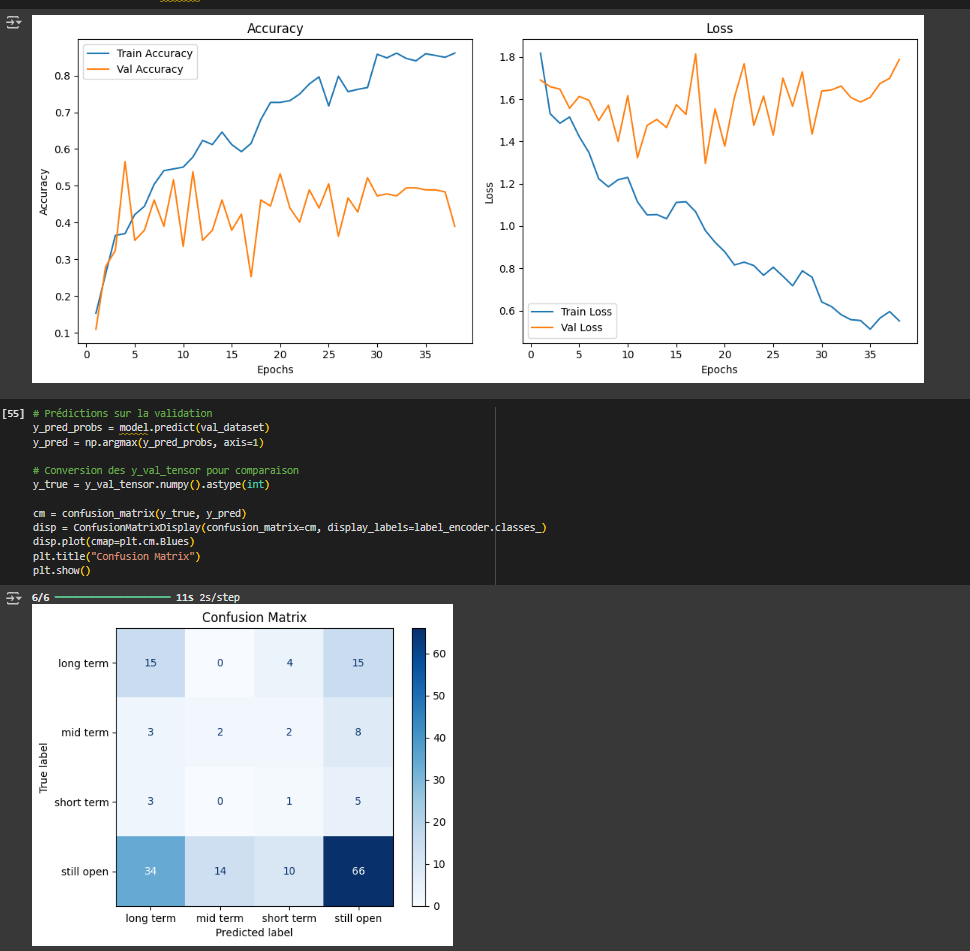

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight

#The perfect model with 1825,365
#que j'ajoute ou j'enlever du dropout, l2 ou chiffre de couche = same shit
#Weights for unbalanced class
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))

# Fonction de création du modèle LSTM avec régularisation L2
def build_lstm_model(sequence_length, n_features, n_classes):
    inputs = layers.Input(shape=(sequence_length, n_features))

    x = layers.LSTM(64, return_sequences=True)(inputs)
    x = layers.BatchNormalization()(x)

    x = layers.LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)

    x = layers.LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

    outputs = layers.Dense(n_classes, activation='softmax')(x)

    return models.Model(inputs, outputs)

# Construction du modèle
model = build_lstm_model(
    sequence_length=X_train.shape[1],
    n_features=X_train.shape[2],
    n_classes=len(np.unique(y_train))
)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Entraînement
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=[
        EarlyStopping(patience=20, restore_best_weights=True, monitor='val_loss'),
        ReduceLROnPlateau(factor=0.5, patience=10, min_lr=1e-6),
    ]
)


y_preds = []
y_trues = []

for batch_x, batch_y in val_dataset:
    preds = model.predict(batch_x)
    y_preds.extend(np.argmax(preds, axis=1))
    y_trues.extend(batch_y.numpy())

y_preds = np.array(y_preds)
y_trues = np.array(y_trues)

# Calcul du F1 Score
f1 = f1_score(y_trues, y_preds, average='weighted')
print(f'F1 Score (weighted) sur les données de validation : {f1:.4f}')

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1865, 9)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 1865, 64)            │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1865, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1865, 64)            │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1865, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,212 (258.64 KB)

 Trainable params: 65,892 (257.39 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 98s 4s/step - accuracy: 0.1835 - loss: 2.4640 - val_accuracy: 0.1508 - val_loss: 1.6243 - learning_rate: 0.0010
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.3598 - loss: 1.9429 - val_accuracy: 0.3911 - val_loss: 1.5450 - learning_rate: 0.0010
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.5116 - loss: 1.8189 - val_accuracy: 0.3911 - val_loss: 1.5329 - learning_rate: 0.0010
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.5968 - loss: 1.6557 - val_accuracy: 0.3352 - val_loss: 1.5359 - learning_rate: 0.0010
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.6389 - loss: 1.4383 - val_accuracy: 0.3128 - val_loss: 1.5220 - learning_rate: 0.0010
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.6567 - loss: 1.5224 - val_accuracy: 0.3743 - val_loss: 1.5089 - learning_rate: 0.0010
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.6868 - loss: 1.3201 - val_accur

In [ ]:
# # LSTM
# def build_lstm_model(sequence_length, n_features, n_classes):
#     inputs = layers.Input(shape=(sequence_length, n_features))

#     x = layers.LSTM(64, return_sequences=True)(inputs)
#     x = layers.Dropout(0.3)(x)
#     x = layers.BatchNormalization()(x)

#     x = layers.LSTM(64, return_sequences=True)(x)
#     x = layers.Dropout(0.3)(x)
#     x = layers.BatchNormalization()(x)

#     x = layers.LSTM(32)(x)
#     x = layers.Dropout(0.3)(x)
#     x = layers.BatchNormalization()(x)

#     x = layers.Dense(32, activation='relu')(x)
#     x = layers.Dropout(0.3)(x)

#     outputs = layers.Dense(n_classes, activation='softmax')(x)

#     return models.Model(inputs, outputs)

# model = build_lstm_model(
#     sequence_length=X_train.shape[1],
#     n_features=X_train.shape[2],
#     n_classes=len(label_encoder.classes_)
# )

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# model.compile(
#     optimizer=optimizer,
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.summary()

# # Entraînement
# history = model.fit(
#     train_dataset,
#     validation_data=val_dataset,
#     epochs=50,
#     batch_size=64,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
#         tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=10, min_lr=1e-6)
#     ]
# )


In [ ]:
# # CNN

# model = models.Sequential([
#     layers.Conv1D(filters=32, kernel_size=3, padding='same', input_shape=(X_train.shape[1], X_train.shape[2])),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Dropout(0.1),

#     layers.Conv1D(filters=64, kernel_size=3, padding='same'),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling1D(pool_size=2),
#     layers.Dropout(0.1),

#     layers.Conv1D(filters=128, kernel_size=3, padding='same'),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.GlobalAveragePooling1D(),
#     layers.Dropout(0.1),

#     layers.Dense(64,),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dropout(0.1),

#     layers.Dense(5, activation='softmax')
# ])

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

# model.compile(
#     optimizer=optimizer,
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.summary()

# history = model.fit(train_dataset,epochs=100,validation_data=val_dataset,verbose=1)

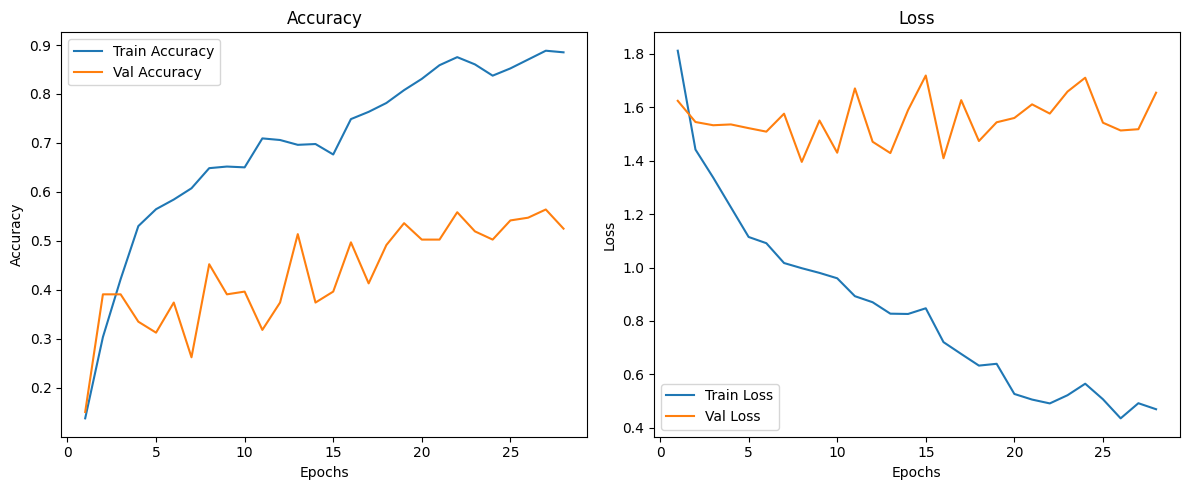

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 765ms/step


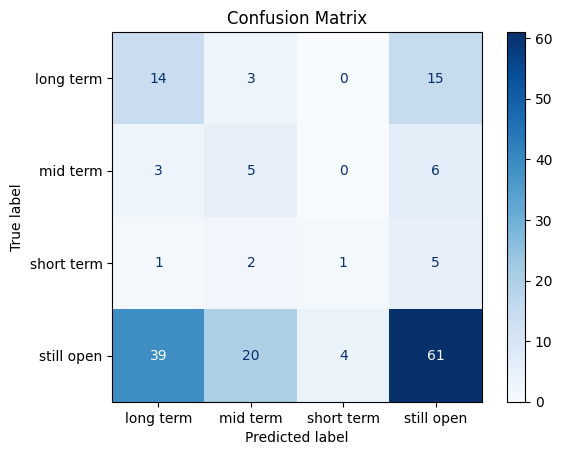

In [ ]:
# Prédictions sur la validation
y_pred_probs = model.predict(val_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)

# Conversion des y_val_tensor pour comparaison
y_true = y_val_tensor.numpy().astype(int)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save('station_lstm_classif.h5')

# Survival Analysis

In [44]:
pip install scikit-survival

In [130]:
from sksurv.util import Surv
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.metrics import concordance_index_censored

## Just snowfall

In [131]:
# Créer un df
df_survival = df_final.copy().reset_index()
df_survival.loc[df_survival['closed_year'] == 2125, 'closed_year'] = np.nan

In [132]:
# Grouper par station et ajouter les colonnes souhaitées
df_survival["date"] = pd.to_datetime(df_survival["date"])
df_survival['year'] = df_survival["date"].dt.year

In [133]:
stations_ouvertes = df_survival.loc[df_survival["state"] == 'open']
stations_fermees = df_survival.loc[df_survival["state"] == 'closed']

stations_ouvertes = stations_ouvertes['station'].unique()
stations_fermees = stations_fermees['station'].unique()

# 80%
stations_ouvertes_sample = pd.Series(stations_ouvertes).sample(frac=0.8, random_state=1,replace = False)
stations_fermees_sample = pd.Series(stations_fermees).sample(frac=0.8, random_state=1,replace = False)

# 20%
stations_ouvertes_val = pd.Series(list(set(stations_ouvertes) - set(stations_ouvertes_sample)))
stations_fermees_val = pd.Series(list(set(stations_fermees) - set(stations_fermees_sample)))

train_df = df_survival[df_survival['station'].isin(list(stations_ouvertes_sample) + list(stations_fermees_sample))]
val_df = df_survival[df_survival['station'].isin(list(stations_ouvertes_val) + list(stations_fermees_val))]

print(f"Train set : {train_df.shape}")
print(f"Validation set : {val_df.shape}")

Train set : (261980, 18)
Validation set : (76939, 18)


In [134]:
#Val DF
grouped = val_df.groupby(["year", "station"])
val_df = grouped.agg({
    "state": "first",
    "date": ["min", "max"],
    "closed_year": "first",
    "temperature_2m_mean": "mean",
    "snowfall_sum": "mean",
    "rain_sum": "mean",
    "altitude": "first",
    "cloud_cover_mean": "mean",
    "sunshine_duration": "mean",
    "wind_speed_10m_mean": "mean",
    "soil_temperature_0_to_100cm_mean": "mean"
})

# Renommage des colonnes
val_df.columns = [
    "state", "open_date", "last_obs_date", "closed_year",
    "temperature_2m_mean", "snowfall_sum", "rain_sum", "altitude",
    "cloud_cover_mean", "sunshine_duration", "wind_speed_10m_mean",
    "soil_temperature_0_to_100cm_mean"
]

# Remise à plat des index (station + year)
val_df = val_df.reset_index()

val_df["event"] = val_df["closed_year"].notna()

# Utilise la date réelle de fermeture ou la dernière observation
val_df["closed_date"] = pd.to_datetime(val_df["closed_year"].dropna().astype(int), format="%Y", errors='coerce') \
    .reindex(val_df.index)
val_df["closed_date"] = val_df["closed_date"].where(val_df["event"], val_df["last_obs_date"])

# Durée en années
val_df["duration"] = (val_df["closed_date"] - val_df["open_date"]).dt.days/365.25

# Cibles
y_val = Surv.from_arrays(event=val_df["event"], time=val_df["duration"])

# Features
features = ["snowfall_sum"]
X = val_df[features]
X_val_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=features, index=val_df.index)

print(X_val_scaled.shape)
print(y_val.shape)

(217, 1)
(217,)


In [135]:
#Train DF
grouped = train_df.groupby(["year", "station"])
train_df = grouped.agg({
    "state": "first",
    "date": ["min", "max"],
    "closed_year": "first",
    "temperature_2m_mean": "mean",
    "snowfall_sum": "mean",
    "rain_sum": "mean",
    "altitude": "first",
    "cloud_cover_mean": "mean",
    "sunshine_duration": "mean",
    "wind_speed_10m_mean": "mean",
    "soil_temperature_0_to_100cm_mean": "mean"
})

# Renommage des colonnes
train_df.columns = [
    "state", "open_date", "last_obs_date", "closed_year",
    "temperature_2m_mean", "snowfall_sum", "rain_sum", "altitude",
    "cloud_cover_mean", "sunshine_duration", "wind_speed_10m_mean",
    "soil_temperature_0_to_100cm_mean"
]

# Remise à plat des index (station + year)
train_df = train_df.reset_index()

train_df["event"] = train_df["closed_year"].notna()

# Utilise la date réelle de fermeture ou la dernière observation
train_df["closed_date"] = pd.to_datetime(train_df["closed_year"].dropna().astype(int), format="%Y", errors='coerce') \
    .reindex(train_df.index)
train_df["closed_date"] = train_df["closed_date"].where(train_df["event"], train_df["last_obs_date"])

# Durée en années
train_df["duration"] = (train_df["closed_date"] - train_df["open_date"]).dt.days/365.25

# Cibles
y_train = Surv.from_arrays(event=train_df["event"], time=train_df["duration"])

# Features
features = ["snowfall_sum"]
X = train_df[features]
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=features, index=train_df.index)

print(X_train_scaled.shape)
print(y_train.shape)

(739, 1)
(739,)


In [136]:
# Entraînement modèle CoxPH
cox = CoxPHSurvivalAnalysis().fit(X_train_scaled, y_train)

In [137]:
# Concordance Index - version corrigée sans idx_train / idx_test
cindex_train = concordance_index_censored(
    train_df["event"].values,
    train_df["duration"].values,
    cox.predict(X_train_scaled)
)
cindex_val = concordance_index_censored(
    val_df["event"].values,
    val_df["duration"].values,
    cox.predict(X_val_scaled)
)

print(f"[Cox] C-index Train : {cindex_train[0]:.3f}")
print(f"[Cox] C-index Test  : {cindex_val[0]:.3f}")

[Cox] C-index Train : 0.612
[Cox] C-index Test  : 0.507


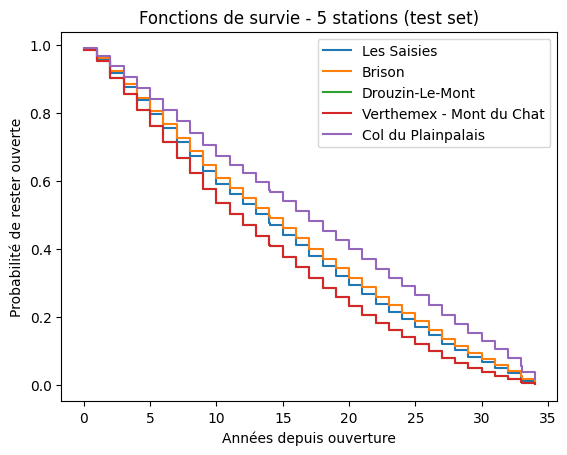

In [138]:
# Courbes de survie
surv_funcs = cox.predict_survival_function(X_val_scaled.iloc[:5])
station_names = df_survival.loc[X_val_scaled.iloc[:5].index, "station"].values

for i, fn in enumerate(surv_funcs):
    plt.step(fn.x, fn.y, where="post", label=f"{station_names[i]}")
plt.xlabel("Années depuis ouverture")
plt.ylabel("Probabilité de rester ouverte")
plt.legend()
plt.title("Fonctions de survie - 5 stations (test set)")
plt.show()

In [139]:
coefs = pd.Series(cox.coef_, index=X_val_scaled.columns)
print(coefs.sort_values())

snowfall_sum   -0.188428
dtype: float64


La neige est protectrice : elle est associée à une réduction du risque (donc à une durée de survie plus longue).


In [140]:
from sksurv.metrics import cumulative_dynamic_auc

# Définir des points dans le temps (en années)
times = np.arange(1, 6)  # AUC à 1, 2, 3, 4 et 5 ans

# AUC dynamiques
auc_values, mean_auc = cumulative_dynamic_auc(
    y_train, y_val, cox.predict(X_val_scaled), times
)

# Affichage
for t, auc in zip(times, auc_values):
    print(f"AUC à {t:.1f} ans : {auc:.3f}")

AUC à 1.0 ans : 0.369
AUC à 2.0 ans : 0.304
AUC à 3.0 ans : 0.438
AUC à 4.0 ans : 0.348
AUC à 5.0 ans : 0.293


Pas de résultats concluant on préfère mettre toutes les features

##Avec toutes les features

In [141]:
# Créer un df
df_survival = df_final.copy().reset_index()
df_survival.loc[df_survival['closed_year'] == 2125, 'closed_year'] = np.nan

In [142]:
# Grouper par station et ajouter les colonnes souhaitées
df_survival["date"] = pd.to_datetime(df_survival["date"])
df_survival['year'] = df_survival["date"].dt.year

In [143]:
stations_ouvertes = df_survival.loc[df_survival["state"] == 'open']
stations_fermees = df_survival.loc[df_survival["state"] == 'closed']

stations_ouvertes = stations_ouvertes['station'].unique()
stations_fermees = stations_fermees['station'].unique()

# 80%
stations_ouvertes_sample = pd.Series(stations_ouvertes).sample(frac=0.8, random_state=1,replace = False)
stations_fermees_sample = pd.Series(stations_fermees).sample(frac=0.8, random_state=1,replace = False)

# 20%
stations_ouvertes_val = pd.Series(list(set(stations_ouvertes) - set(stations_ouvertes_sample)))
stations_fermees_val = pd.Series(list(set(stations_fermees) - set(stations_fermees_sample)))

train_df = df_survival[df_survival['station'].isin(list(stations_ouvertes_sample) + list(stations_fermees_sample))]
val_df = df_survival[df_survival['station'].isin(list(stations_ouvertes_val) + list(stations_fermees_val))]

print(f"Train set : {train_df.shape}")
print(f"Validation set : {val_df.shape}")

Train set : (261980, 18)
Validation set : (76939, 18)


In [144]:
#Val DF
grouped = val_df.groupby(["year", "station"])
val_df = grouped.agg({
    "state": "first",
    "date": ["min", "max"],
    "closed_year": "first",
    "temperature_2m_mean": "mean",
    "snowfall_sum": "mean",
    "rain_sum": "mean",
    "altitude": "first",
    "cloud_cover_mean": "mean",
    "sunshine_duration": "mean",
    "wind_speed_10m_mean": "mean",
    "soil_temperature_0_to_100cm_mean": "mean",
    "latitude": "first",
    "longitude": "first"
})


# Renommage des colonnes
val_df.columns = [
    "state", "open_date", "last_obs_date", "closed_year",
    "temperature_2m_mean", "snowfall_sum", "rain_sum", "altitude",
    "cloud_cover_mean", "sunshine_duration", "wind_speed_10m_mean",
    "soil_temperature_0_to_100cm_mean","latitude","longitude"
]

# Remise à plat des index (station + year)
val_df = val_df.reset_index()

val_df["event"] = val_df["closed_year"].notna()

# Utilise la date réelle de fermeture ou la dernière observation
val_df["closed_date"] = pd.to_datetime(val_df["closed_year"].dropna().astype(int), format="%Y", errors='coerce') \
    .reindex(val_df.index)
val_df["closed_date"] = val_df["closed_date"].where(val_df["event"], val_df["last_obs_date"])

# Durée en années
val_df["duration"] = (val_df["closed_date"] - val_df["open_date"]).dt.days/365.25
val_df = val_df[val_df["duration"] >= 0]

# Cibles
y_val = Surv.from_arrays(event=val_df["event"], time=val_df["duration"])

# Features
features = ["snowfall_sum", "rain_sum","cloud_cover_mean","sunshine_duration", "wind_speed_10m_mean","soil_temperature_0_to_100cm_mean","temperature_2m_mean"]
X = val_df[features]
X_val_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=features, index=val_df.index)

print(X_val_scaled.shape)
print(y_val.shape)

(217, 7)
(217,)


In [145]:
#Train DF
grouped = train_df.groupby(["year", "station"])
train_df = grouped.agg({
    "state": "first",
    "date": ["min", "max"],
    "closed_year": "first",
    "temperature_2m_mean": "mean",
    "snowfall_sum": "mean",
    "rain_sum": "mean",
    "altitude": "first",
    "cloud_cover_mean": "mean",
    "sunshine_duration": "mean",
    "wind_speed_10m_mean": "mean",
    "soil_temperature_0_to_100cm_mean": "mean",
    "latitude": "first",
    "longitude": "first"
})

# Renommage des colonnes
train_df.columns = [
    "state", "open_date", "last_obs_date", "closed_year",
    "temperature_2m_mean", "snowfall_sum", "rain_sum", "altitude",
    "cloud_cover_mean", "sunshine_duration", "wind_speed_10m_mean",
    "soil_temperature_0_to_100cm_mean","latitude","longitude"
]

# Remise à plat des index (station + year)
train_df = train_df.reset_index()

train_df["event"] = train_df["closed_year"].notna()

# Utilise la date réelle de fermeture ou la dernière observation
train_df["closed_date"] = pd.to_datetime(train_df["closed_year"].dropna().astype(int), format="%Y", errors='coerce') \
    .reindex(train_df.index)
train_df["closed_date"] = train_df["closed_date"].where(train_df["event"], train_df["last_obs_date"])

# Durée en années
train_df["duration"] = (train_df["closed_date"] - train_df["open_date"]).dt.days/365.25
train_df = train_df[train_df["duration"] >= 0]

# Cibles
y_train = Surv.from_arrays(event=train_df["event"], time=train_df["duration"])

# Features
features = ["snowfall_sum", "rain_sum","cloud_cover_mean","sunshine_duration", "wind_speed_10m_mean","soil_temperature_0_to_100cm_mean","temperature_2m_mean"]
X = train_df[features]
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=features, index=train_df.index)

print(X_train_scaled.shape)
print(y_train.shape)

(739, 7)
(739,)


In [146]:
# Entraînement modèle CoxPH
cox = CoxPHSurvivalAnalysis().fit(X_train_scaled, y_train)

In [147]:
# Concordance Index - version corrigée sans idx_train / idx_test
cindex_train = concordance_index_censored(
    train_df["event"].values,
    train_df["duration"].values,
    cox.predict(X_train_scaled)
)
cindex_val = concordance_index_censored(
    val_df["event"].values,
    val_df["duration"].values,
    cox.predict(X_val_scaled)
)

print(f"[Cox] C-index Train : {cindex_train[0]:.3f}")
print(f"[Cox] C-index Test  : {cindex_val[0]:.3f}")

[Cox] C-index Train : 0.734
[Cox] C-index Test  : 0.630


Mesure la capacité du modèle à bien ordonner les durées de survie.


In [148]:
# Coefficients bruts (beta)
coef = cox.coef_

# Hazard Ratios = exp(beta)
hazard_ratios = np.exp(coef)

results = pd.DataFrame({
    'variable': X_val_scaled.columns,
    'coef (β)': coef,
    'HR (exp(β))': hazard_ratios
})

display(results)

,variable,coef (β),HR (exp(β))
0,snowfall_sum,-0.222967,0.800141
1,rain_sum,-0.653845,0.520042
2,cloud_cover_mean,0.150805,1.162770
3,sunshine_duration,-0.341042,0.711029
4,wind_speed_10m_mean,-0.029005,0.971411
5,soil_temperature_0_to_100cm_mean,1.229419,3.419241
6,temperature_2m_mean,-0.559611,0.571432


Le Hazard Ratio (HR) compare le risque instantané qu’un événement se produise si <1 = le risque est réduit si >1 le risque est augmenté.






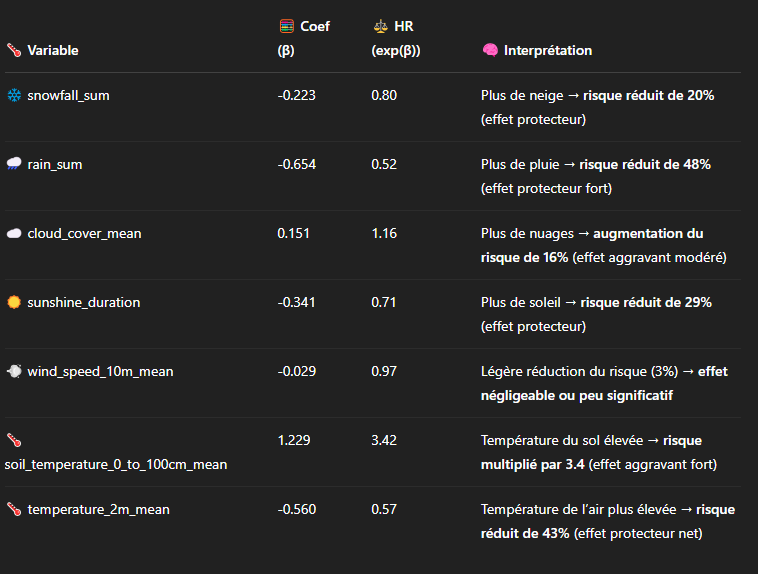

In [170]:
from sksurv.metrics import cumulative_dynamic_auc

#Définir des points dans le temps (year) = à quel point mon modele sait différencier entre station de ski ferment
times = np.arange(1, 33)

auc_values, mean_auc = cumulative_dynamic_auc(
    y_train, y_val, cox.predict(X_val_scaled), times
)
for t, auc in zip(times, auc_values):
    print(f"AUC à {t:.1f} ans : {auc:.3f}")

AUC à 1.0 ans : 0.606
AUC à 2.0 ans : 0.483
AUC à 3.0 ans : 0.508
AUC à 4.0 ans : 0.560
AUC à 5.0 ans : 0.536
AUC à 6.0 ans : 0.531
AUC à 7.0 ans : 0.512
AUC à 8.0 ans : 0.552
AUC à 9.0 ans : 0.530
AUC à 10.0 ans : 0.513
AUC à 11.0 ans : 0.515
AUC à 12.0 ans : 0.517
AUC à 13.0 ans : 0.539
AUC à 14.0 ans : 0.568
AUC à 15.0 ans : 0.596
AUC à 16.0 ans : 0.580
AUC à 17.0 ans : 0.561
AUC à 18.0 ans : 0.590
AUC à 19.0 ans : 0.599
AUC à 20.0 ans : 0.657
AUC à 21.0 ans : 0.650
AUC à 22.0 ans : 0.658
AUC à 23.0 ans : 0.649
AUC à 24.0 ans : 0.639
AUC à 25.0 ans : 0.664
AUC à 26.0 ans : 0.695
AUC à 27.0 ans : 0.791
AUC à 28.0 ans : 0.772
AUC à 29.0 ans : 0.715
AUC à 30.0 ans : 0.665
AUC à 31.0 ans : 0.665
AUC à 32.0 ans : 0.900


L'AUC (Area Under the Curve) est une mesure utilisée pour évaluer la performance d'un modèle de classification. Pour des modèles de survie, l'AUC dynamique mesure la capacité de ton modèle à distinguer entre les événements (ex : fermeture d'une station de ski) et les non-événements (ex : station de ski ouverte) à un moment spécifique dans le temps.

Exemple : AUC de 0.75 après 1 an : Le modèle est relativement bon pour prédire si une station de ski fermera ou non au bout d'un an.


##Création d'un dataframe avec les pred pour mettre dans le streamlit

(14, 7)


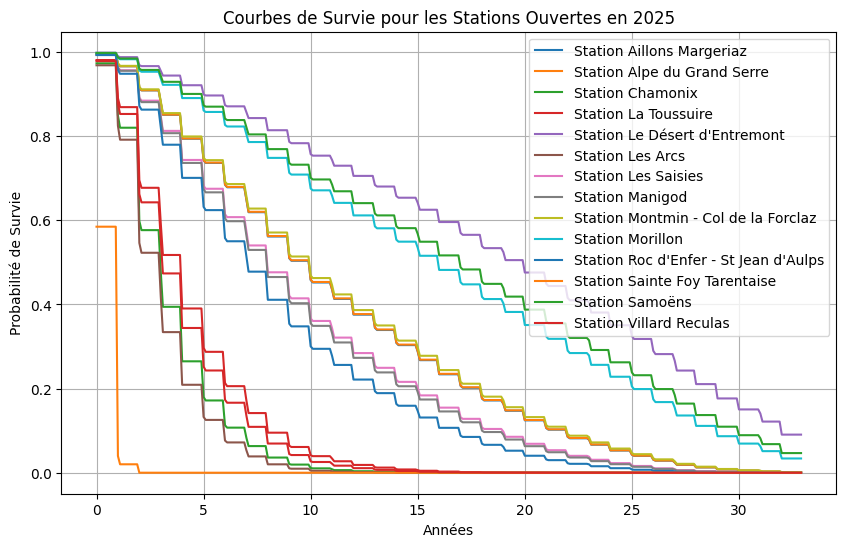

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,station
0,0.995283,0.995283,0.995283,0.995283,0.971997,0.966130,0.914689,0.908814,8.798182e-01,8.507892e-01,...,1.122114e-02,7.708701e-03,4.919247e-03,4.070340e-03,2.704698e-03,1.184301e-03,3.722245e-04,1.014688e-04,3.100626e-06,Aillons Margeriaz
1,0.995298,0.995298,0.995298,0.995298,0.972086,0.966238,0.914954,0.909097,8.801846e-01,8.512363e-01,...,1.138614e-02,7.831610e-03,5.004984e-03,4.143833e-03,2.757195e-03,1.210534e-03,3.819038e-04,1.045482e-04,3.231162e-06,Alpe du Grand Serre
2,0.973141,0.973141,0.973141,0.973141,0.849129,0.820038,0.598427,0.576632,4.784247e-01,3.943788e-01,...,5.916625e-12,6.810769e-13,5.127513e-14,1.722686e-14,1.637153e-15,1.409085e-17,1.797329e-20,1.010143e-23,1.912744e-32,Chamonix
3,0.980912,0.980912,0.980912,0.980912,0.890684,0.868975,0.695275,0.677254,5.934104e-01,5.175667e-01,...,1.127928e-08,2.441709e-09,3.913545e-10,1.808257e-10,3.417841e-11,1.180125e-12,1.054831e-14,5.278230e-17,3.532501e-23,La Toussuire
4,0.998316,0.998316,0.998316,0.998316,0.989928,0.987794,0.968718,0.966496,9.553913e-01,9.440349e-01,...,2.018457e-01,1.765653e-01,1.504446e-01,1.406228e-01,1.215596e-01,9.056523e-02,5.995301e-02,3.772498e-02,1.088214e-02,Le Désert d'Entremont
5,0.968438,0.968438,0.968438,0.968438,0.824774,0.791592,0.546174,0.522820,4.196027e-01,3.342019e-01,...,5.944727e-14,4.657860e-15,2.213168e-16,6.123808e-17,3.828470e-18,1.413811e-20,5.508799e-24,8.174306e-28,4.340781e-38,Les Arcs
6,0.993943,0.993943,0.993943,0.993943,0.964164,0.956693,0.891747,0.884395,8.483064e-01,8.125145e-01,...,3.122995e-03,1.927825e-03,1.082465e-03,8.486157e-04,5.019186e-04,1.737040e-04,3.926142e-05,7.390910e-06,8.361535e-08,Les Saisies
7,0.993748,0.993748,0.993748,0.993748,0.963030,0.955329,0.888459,0.880899,8.438193e-01,8.070942e-01,...,2.592991e-03,1.575954e-03,8.685785e-04,6.756140e-04,3.928873e-04,1.313979e-04,2.830896e-05,5.049806e-06,4.944407e-08,Manigod
8,0.995419,0.995419,0.995419,0.995419,0.972795,0.967092,0.917048,0.911328,8.830790e-01,8.547705e-01,...,1.277540e-02,8.872170e-03,5.735662e-03,4.771912e-03,3.208553e-03,1.438847e-03,4.676061e-04,1.323476e-04,4.473018e-06,Montmin - Col de la Forclaz
9,0.997627,0.997627,0.997627,0.997627,0.985833,0.982839,0.956192,0.953102,9.377021e-01,9.220297e-01,...,1.048102e-01,8.679403e-02,6.926070e-02,6.297355e-02,5.128403e-02,3.386921e-02,1.893594e-02,9.856317e-03,1.708787e-03,Morillon


In [164]:
# Filtrer les stations ouvertes et avec open_date en 2025
stations_ouvertes_2025 = train_df[(train_df["state"] == "open") & (train_df["open_date"].dt.year == 2025)]

# Exemple de prédiction de survie pour ces stations
stations_ouvertes_2025_example = X_train_scaled.loc[stations_ouvertes_2025.index]

print(stations_ouvertes_2025_example.shape)

# Prédiction de survie à travers le temps (sur plusieurs années, par exemple)
times = np.arange(0, 33, 0.1)

# Prédiction de la fonction de survie pour les stations ouvertes en 2025
surv_pred_train = cox.predict_survival_function(stations_ouvertes_2025_example)

# Plot de la courbe de survie pour chaque station ouverte en 2025
plt.figure(figsize=(10, 6))
for idx, surv in enumerate(surv_pred_train):
    plt.plot(times, surv(times), label=f"Station {stations_ouvertes_2025['station'].iloc[idx]}")

plt.title("Courbes de Survie pour les Stations Ouvertes en 2025")
plt.xlabel("Années")
plt.ylabel("Probabilité de Survie")
plt.legend()
plt.grid(True)
plt.show()

noms_stations_ouvertes_2025 = stations_ouvertes_2025['station'].tolist()
y_values_train = []

# Extraction des valeurs de y pour chaque StepFunction
for step_function in surv_pred_train:
    y_values_train.append(step_function.y)

df_y_train = pd.DataFrame(y_values_train)

# Ajouter les noms des stations comme une nouvelle colonne dans le DataFrame final
df_y_train['station'] = noms_stations_ouvertes_2025
display(df_y_train)

(4, 7)


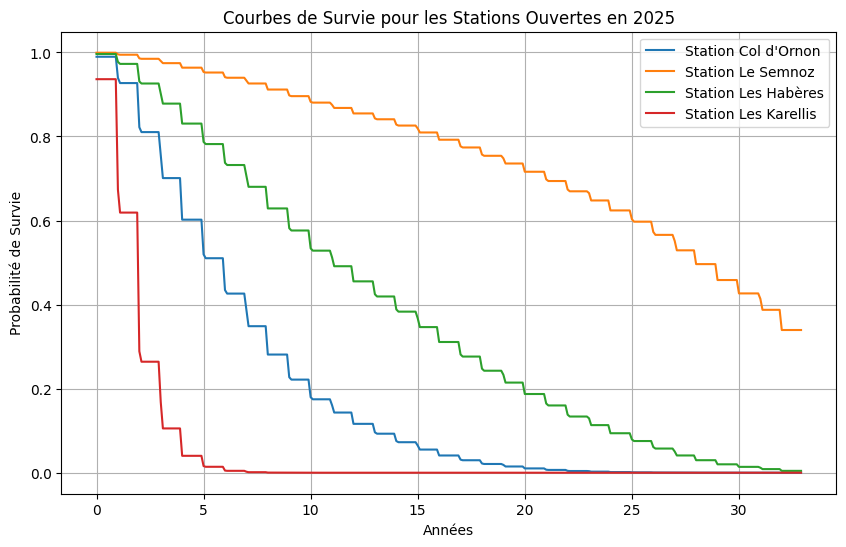

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,station
0,0.989657,0.989657,0.989657,0.989657,0.939459,0.927037,0.821959,0.810396,0.754631,0.700966,...,5.158629e-05,2.259524e-05,8.415513e-06,5.548743e-06,2.258873e-06,3.675346e-07,2.884596e-08,1.655600e-09,7.728915e-13,Col d'Ornon
1,0.999242,0.999242,0.999242,0.999242,0.995457,0.994492,0.985808,0.984790,0.979685,0.974430,...,4.868842e-01,4.584460e-01,4.265962e-01,4.138373e-01,3.875921e-01,3.395338e-01,2.820385e-01,2.289944e-01,1.309160e-01,Le Semnoz
2,0.996206,0.996206,0.996206,0.996206,0.977423,0.972676,0.930815,0.926005,0.902176,0.878165,...,2.705250e-02,2.000363e-02,1.393991e-02,1.197059e-02,8.617756e-03,4.436394e-03,1.749396e-03,6.152415e-04,3.724452e-05,Les Habères
3,0.936278,0.936278,0.936278,0.936278,0.673336,0.618897,0.288888,0.264097,0.168140,0.105383,...,7.025996e-28,3.768364e-30,7.238058e-33,5.176524e-34,1.746548e-36,1.769603e-41,1.771582e-48,2.443789e-56,1.964602e-77,Les Karellis


In [166]:
# Filtrer les stations ouvertes et avec open_date en 2025
stations_ouvertes_2025 = val_df[(val_df["state"] == "open") & (val_df["open_date"].dt.year == 2025)]

# Exemple de prédiction de survie pour ces stations
stations_ouvertes_2025_example = X_val_scaled.loc[stations_ouvertes_2025.index]

print(stations_ouvertes_2025_example.shape)

# Prédiction de survie à travers le temps (sur plusieurs années, par exemple)
times = np.arange(0, 33, 0.1)

# Prédiction de la fonction de survie pour les stations ouvertes en 2025
surv_pred_val = cox.predict_survival_function(stations_ouvertes_2025_example)

# Plot de la courbe de survie pour chaque station ouverte en 2025
plt.figure(figsize=(10, 6))
for idx, surv in enumerate(surv_pred_val):
    plt.plot(times, surv(times), label=f"Station {stations_ouvertes_2025['station'].iloc[idx]}")

plt.title("Courbes de Survie pour les Stations Ouvertes en 2025")
plt.xlabel("Années")
plt.ylabel("Probabilité de Survie")
plt.legend()
plt.grid(True)
plt.show()

# Extraction des noms des stations ouvertes en 2025
noms_stations_ouvertes_2025 = stations_ouvertes_2025['station'].tolist()
y_values_val = []

# Extraction des valeurs de y pour chaque StepFunction
for step_function in surv_pred_val:
    y_values_val.append(step_function.y)
df_y_val = pd.DataFrame(y_values_val)

# Ajouter les noms des stations comme une nouvelle colonne dans le DataFrame final
df_y_val['station'] = noms_stations_ouvertes_2025
display(df_y_val)

In [168]:
df_combined = pd.concat([df_y_val, df_y_train], axis=0, ignore_index=True)
df_combined.to_csv('df_combined.csv', index=False)

In [155]:
#Test
test_array = np.array([9.89657353e-01, 9.89657353e-01, 9.89657353e-01, 9.89657353e-01,
              9.39459457e-01, 9.27036545e-01, 8.21958626e-01, 8.10396230e-01,
              7.54630690e-01, 7.00965521e-01, 6.02062556e-01, 5.19462975e-01,
              5.10323317e-01, 4.34557039e-01, 4.26183985e-01, 3.86416213e-01,
              3.48611261e-01, 2.81159637e-01, 2.74634956e-01, 2.27274314e-01,
              2.21534558e-01, 2.10375222e-01, 1.79621984e-01, 1.74683076e-01,
              1.60578349e-01, 1.43180541e-01, 1.16275670e-01, 9.60823654e-02,
              9.28455284e-02, 7.53894513e-02, 7.25946483e-02, 6.46193025e-02,
              5.50934143e-02, 4.10119759e-02, 3.11743125e-02, 2.96895593e-02,
              2.82479438e-02, 2.19681451e-02, 2.08066787e-02, 1.86240899e-02,
              1.48385191e-02, 1.02416449e-02, 7.20429468e-03, 6.66537029e-03,
              6.15284738e-03, 4.45149323e-03, 4.07557792e-03, 3.72661590e-03,
              2.58922082e-03, 1.55239310e-03, 9.74970341e-04, 8.50723358e-04,
              4.79514469e-04, 4.05726252e-04, 2.85112282e-04, 1.61451708e-04,
              6.71048055e-05, 5.15862889e-05, 2.25952373e-05, 8.41551334e-06,
              5.54874251e-06, 2.25887287e-06, 3.67534649e-07, 2.88459605e-08,
              1.65559976e-09, 7.72891479e-13])
px.line(test_array[::2],width=600)

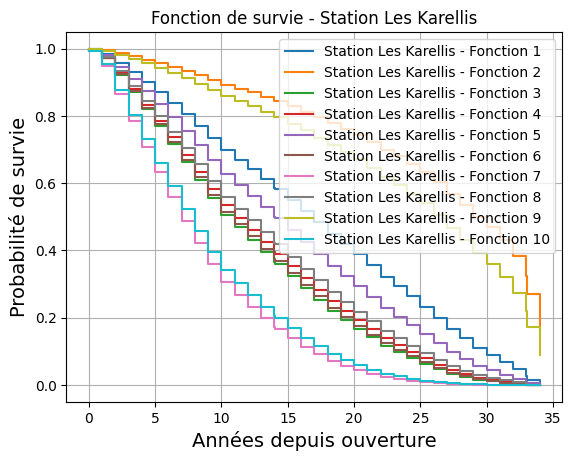

In [169]:
# surv_func = cox.predict_survival_function(X_val_scaled.iloc[0:10])

# # Tracer la courbe de survie
# for j, fn in enumerate(surv_func):
#     plt.step(fn.x, fn.y, where="post", label=f"Station {val_df.iloc[i]['station']} - Fonction {j+1}")
#     plt.title(f"Fonction de survie - Station {val_df.iloc[i]['station']}")
#     plt.xlabel("Années depuis ouverture", fontsize=14)
#     plt.ylabel("Probabilité de survie", fontsize=14)
#     plt.legend()
#     plt.grid(True)

# plt.show()

In [174]:
df_streamlit = pd.read_csv('/content/df_combined.csv')

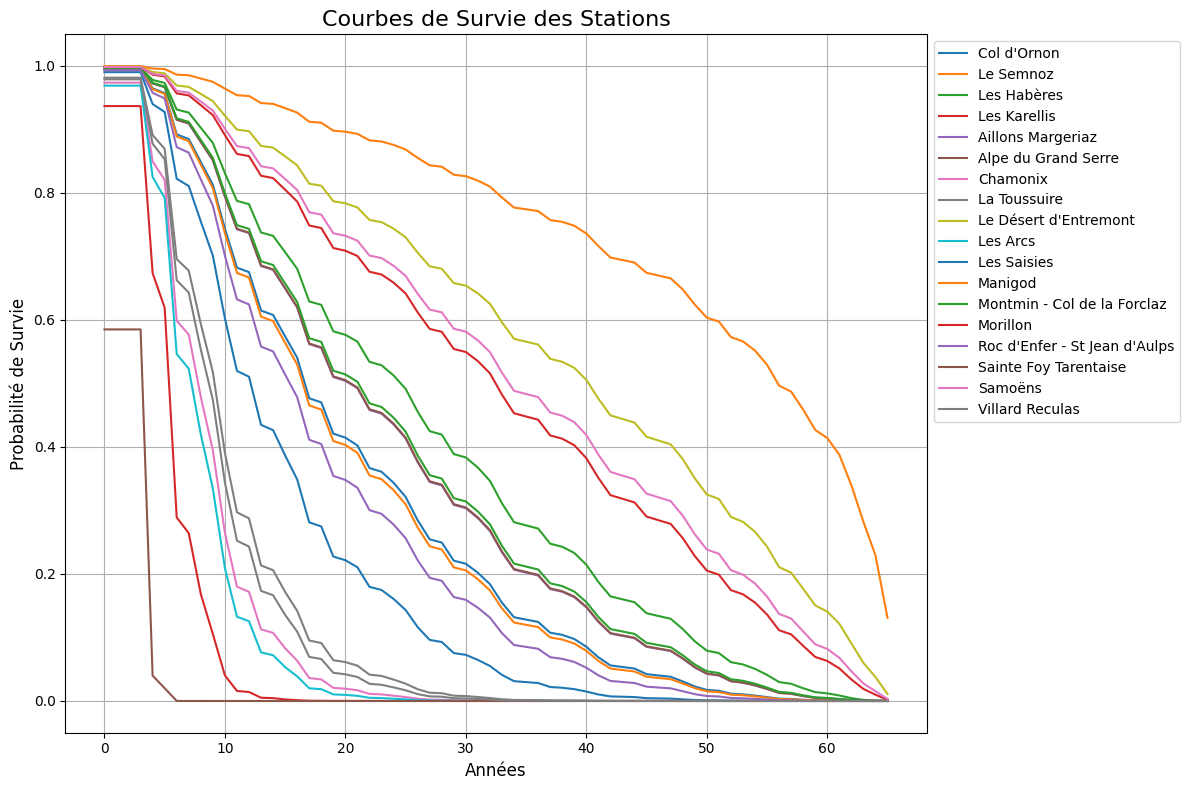

In [175]:
plt.figure(figsize=(12, 8))

# Tracer les courbes pour chaque station
for idx, row in df_combined.iterrows():
    # Récupérer les valeurs de survie (les colonnes 0 à 65)
    survie_values = row.iloc[:-1].values  # Exclure la dernière colonne (nom de la station)

    # Récupérer le nom de la station
    station_name = row.iloc[-1]  # Dernière colonne est le nom de la station

    # Tracer la courbe de survie pour la station
    plt.plot(survie_values, label=station_name)

# Ajouter un titre et des labels aux axes
plt.title("Courbes de Survie des Stations", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Probabilité de Survie", fontsize=12)

# Ajouter une légende
plt.legend(loc='best', bbox_to_anchor=(1, 1))

# Afficher la grille
plt.grid(True)

# Afficher le graphique
plt.tight_layout()  # Pour éviter les chevauchements
plt.show()